# 비트트레이더 RNN MODEL(LSTM, GRU)

#### 전처리
#### LSTM
#### GRU
#### LSTM(Min Max Normalization)
#### LSTM(Min Max Normalization, 층 깊게)
#### GRU(Min Max Normalization, 층 깊게)

In [1]:
import numpy as np
import pandas as pd
import math
import os
import matplotlib.pyplot as plt
 

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Reshape, GRU

#os.environ['CUDA_VISIBLE_DEVICES']="2"

### 전처리

In [2]:
train_x_df=pd.read_csv('train_x_df.csv') 
train_y_df=pd.read_csv('train_y_df.csv')
test_x_df=pd.read_csv('test_x_df.csv')
sample_submission=pd.read_csv('sample_submission.csv')

In [3]:
print(np.shape(train_x_df))
print(len(train_x_df)/1380, len(train_y_df)/120)

(10942020, 12)
7929.0 7929.0


In [4]:
print(train_x_df.sample_id.nunique())
print(train_y_df.sample_id.nunique())

7929
7929


In [5]:
train_x_df.head(2)

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
0,0,0,0,0.993147,0.993546,0.992857,0.992966,1379.478027,3778.584961,11.240029,329.655548,903.091614
1,0,1,0,0.993256,0.993546,0.992712,0.992712,3438.807373,9419.426758,11.602611,1363.999268,3737.512695


In [6]:
train_y_df.head(2)

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
0,0,0,0,1.000326,1.002683,0.999420,1.00116,6848.100586,18914.638672,56.925312,2409.717285,6656.051270
1,0,1,0,1.001342,1.001450,0.999347,1.00000,5056.033691,13946.318359,42.059464,2371.283691,6540.831543


In [7]:
len(test_x_df)/1380

760.0

iloc를 사용해 필요없는 index없앰

In [8]:
train_x_df.iloc[:,3:].values

array([[9.93147254e-01, 9.93546128e-01, 9.92857218e-01, ...,
        1.12400293e+01, 3.29655548e+02, 9.03091614e+02],
       [9.93255973e-01, 9.93546128e-01, 9.92712140e-01, ...,
        1.16026106e+01, 1.36399927e+03, 3.73751270e+03],
       [9.92748380e-01, 9.94815111e-01, 9.92458344e-01, ...,
        1.95794067e+01, 1.22280286e+03, 3.35068872e+03],
       ...,
       [9.99707699e-01, 1.00000000e+00, 9.99488533e-01, ...,
        6.20981872e-01, 7.88707495e-01, 1.07937714e+02],
       [9.99707699e-01, 1.00014603e+00, 9.99488533e-01, ...,
        7.52483904e-01, 8.69763434e-01, 1.19042564e+02],
       [1.00000000e+00, 1.00029218e+00, 9.99853849e-01, ...,
        3.94506127e-01, 5.62873721e-01, 7.70531311e+01]])

1380분 후 120분을 예측하는 모델을 만들기 위한 reshape

In [9]:
train_x = tf.reshape(train_x_df.iloc[:,3].values, [-1, 1380, 1])
train_y = tf.reshape(train_y_df.iloc[:,3].values, [-1, 120, 1])
test_x = tf.reshape(test_x_df.iloc[:,3].values, [-1, 1380, 1])

In [ ]:
train_x = ((train_x-min(train_x))/(max(train_x)-min(train_x))
train_y = ((train_x-min(train_x))/(max(train_x)-min(train_x))

In [10]:
train_x[:, 1379, 0]

<tf.Tensor: shape=(7929,), dtype=float64, numpy=array([1., 1., 1., ..., 1., 1., 1.])>

In [11]:
test_x[:, 1379, 0]

<tf.Tensor: shape=(760,), dtype=float64, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

shape 확인, 학습을 위한 7929개의 샘플, test를 위한 760개의 샘플

In [12]:
print(train_x.shape, train_y.shape, test_x.shape)

(7929, 1380, 1) (7929, 120, 1) (760, 1380, 1)


np.arrange로 1380분~1500분 반환

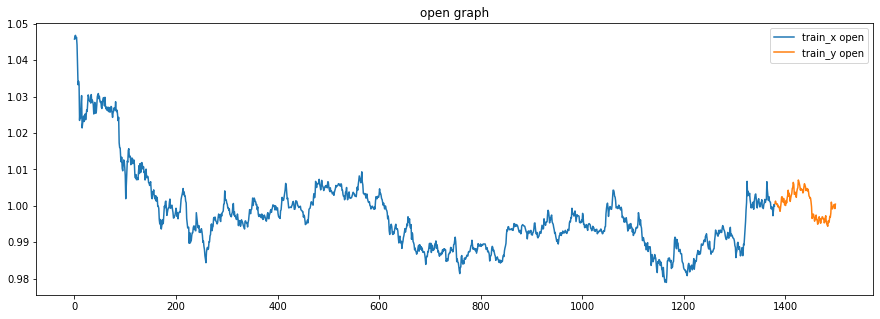

In [13]:
row=1
plt.figure(figsize=(15,5))


plt.plot(train_x[row,:,0], label='train_x open')
plt.plot(np.arange(train_x.shape[1],train_x.shape[1]+ train_y.shape[1]), train_y[row, :, 0], label='train_y open')
plt.legend()
plt.title('open graph')
plt.show()

In [35]:
train_x[row,:,0]

<tf.Tensor: shape=(1380,), dtype=float64, numpy=
array([1.04582441, 1.04666603, 1.04685307, ..., 0.99869072, 1.00037408,
       1.        ])>

In [14]:
train_x.shape

TensorShape([7929, 1380, 1])

In [15]:
train_y.shape

TensorShape([7929, 120, 1])

In [16]:
input_window=170
output_window=60
num_features=1
window=input_window + output_window

train_window_x= np.zeros(( train_x.shape[0], (train_x.shape[1]-(input_window + output_window))//230, input_window, num_features))
train_window_y= np.zeros(( train_x.shape[0], (train_x.shape[1]-(input_window + output_window))//230, output_window, num_features))
print(train_window_x.shape, train_window_y.shape)

for example in range(train_x.shape[0]):
    
    for start in range(0,  train_x.shape[1]-(input_window + output_window), 230):
        end=start+input_window
        train_window_x[example, start//230, :, :] = train_x[example, start: end               , :]
        train_window_y[example, start//230, :, :] = train_x[example, end  : end+ output_window, :]

(7929, 5, 170, 1) (7929, 5, 60, 1)


In [17]:
new_train_x=tf.reshape(train_window_x, [-1, 170, 1])
new_train_y=tf.reshape(train_window_y, [-1, 60, 1])

### Try1 : 1계층 LSTM Layer를 쌓고 30에폭으로 학습

In [23]:
time        = new_train_x.shape[1] #170
num_features= new_train_x.shape[2] #1
OUT_STEPS   = new_train_y.shape[1] #60

#####층 쌓기###########


model=Sequential([
LSTM(32, input_shape=(time, num_features), dropout=0.2, recurrent_dropout=0.2),
Dense(OUT_STEPS * num_features),
Reshape([OUT_STEPS, num_features])
])



#######Compile 구성하기################


model.compile(optimizer='rmsprop', loss='mae', metrics=['mae', 'accuracy'])
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 1 == 0: print(epoch)
        print('.', end='')

#가장 좋은 성능을 낸 val_loss가 적은 model만 남겨 놓았습니다.
save_best_only=tf.keras.callbacks.ModelCheckpoint(filepath="lstm_model.h5", monitor='val_loss', save_best_only=True)


early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

#검증 손실이 10epoch 동안 좋아지지 않으면 학습률을 0.1 배로 재구성하는 명령어입니다.
reduceLR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10)


######################
history = model.fit(new_train_x, new_train_y, epochs=30, batch_size=64, validation_split = 0.2, verbose=0, callbacks=[PrintDot(), early_stop, save_best_only , reduceLR])

0
.1
.2
.3
.4
.5
.6
.7
.8
.9
.10
.11
.12
.13
.14
.15
.16
.17
.18
.19
.20
.21
.22
.23
.24
.25
.26
.27
.28
.29
.

아래는 10에폭의 결과, <span style="color:red">에폭을 늘리면 좀 더 성능이 좋아질 여지가 있어보임</span>

In [41]:
pd.DataFrame(history.history)

,loss,mae,accuracy,val_loss,val_mae,val_accuracy,lr
0,0.071151,0.071151,0.002277,0.027171,0.027171,0.002028,0.001
1,0.031820,0.031820,0.002353,0.026935,0.026935,0.002028,0.001
2,0.029814,0.029814,0.002353,0.026858,0.026858,0.002028,0.001
3,0.029251,0.029251,0.002353,0.026000,0.026000,0.002028,0.001
4,0.028970,0.028970,0.002353,0.026373,0.026373,0.002028,0.001
5,0.028621,0.028621,0.002353,0.028803,0.028803,0.002028,0.001
6,0.028562,0.028562,0.002353,0.027566,0.027566,0.002028,0.001
7,0.028276,0.028276,0.002353,0.027217,0.027217,0.002028,0.001
8,0.028184,0.028184,0.002353,0.028209,0.028209,0.002028,0.001
9,0.028247,0.028247,0.002353,0.026473,0.026473,0.002028,0.001


그래서 30에폭의 결과

In [25]:
pd.DataFrame(history.history)

,loss,mae,accuracy,val_loss,val_mae,val_accuracy,lr
0,0.075599,0.075599,0.002227,0.028779,0.028779,0.002028,0.001
1,0.032109,0.032109,0.002353,0.032235,0.032235,0.002028,0.001
2,0.030216,0.030216,0.002353,0.027750,0.027750,0.002028,0.001
3,0.029666,0.029666,0.002353,0.028844,0.028844,0.002028,0.001
4,0.029309,0.029309,0.002353,0.026000,0.026000,0.002028,0.001
5,0.029065,0.029065,0.002353,0.029518,0.029518,0.002028,0.001
6,0.028880,0.028880,0.002353,0.029173,0.029173,0.002028,0.001
7,0.028875,0.028875,0.002353,0.027080,0.027080,0.002028,0.001
8,0.028668,0.028668,0.002353,0.029103,0.029103,0.002028,0.001
9,0.028675,0.028675,0.002353,0.025721,0.025721,0.002028,0.001


In [26]:
print(new_train_x.shape, new_train_y.shape)

(39645, 170, 1) (39645, 60, 1)


In [27]:
test_x = tf.reshape(test_x_df.iloc[:,3].values, [-1, 1380, 1])

In [28]:
auto_x=test_x
auto_x.shape

TensorShape([760, 1380, 1])

In [29]:
submission=np.zeros((760, 120, 9))

In [30]:
end_=120
output_window = 60

for i in range(end_//output_window):
    start_ = i *output_window
    next_ = model.predict(auto_x[:, -170:, :])
    auto_x=tf.concat([auto_x, next_], axis=1)
    print(auto_x.shape)
    submission[:, start_ : start_ + output_window, :] = next_

(760, 1440, 1)
(760, 1500, 1)


In [31]:
submission.shape

(760, 120, 9)

In [32]:
print(submission[1,:,0])
print(np.argmax(submission[1,:,0], axis=0))
print(np.max(submission[1,:,0], axis=0))

[1.01847756 1.01757717 1.01931429 1.02114439 1.01896191 1.02020359
 1.01901007 1.01871479 1.01611984 1.02015829 1.02319539 1.02242863
 1.01839638 1.01614904 1.01769078 1.01790452 1.02182138 1.02123761
 1.01977277 1.01871037 1.01584744 1.0174154  1.01701725 1.01773798
 1.01548052 1.01736927 1.0170778  1.01337469 1.01904809 1.01777732
 1.01639688 1.0164001  1.01944864 1.0173856  1.01559281 1.01600885
 1.01327848 1.01523125 1.01596951 1.01430893 1.01375282 1.01776052
 1.01112747 1.01736295 1.0140847  1.01472414 1.02094579 1.0174737
 1.0190208  1.01810384 1.01717067 1.01926064 1.01842535 1.01608682
 1.01782417 1.01767325 1.01833224 1.01665866 1.01921499 1.01444399
 1.02383137 1.02331233 1.02486289 1.02606928 1.02336037 1.02543235
 1.02465689 1.02427399 1.02205861 1.02606368 1.02735472 1.02905118
 1.02355349 1.02219224 1.02257431 1.0225451  1.02767551 1.02644455
 1.02432323 1.0235678  1.01964641 1.02191186 1.02215958 1.02296495
 1.02037919 1.0223906  1.02239311 1.0183897  1.02408671 1.02280

10에폭시 결과물

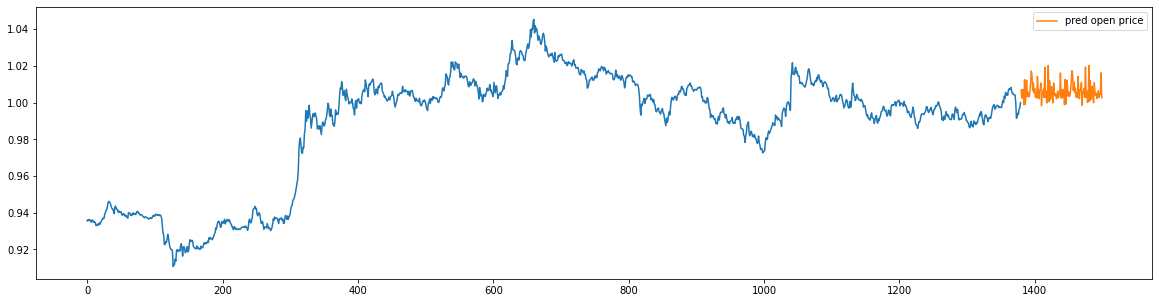

In [49]:
row +=1
plt.figure(figsize=(20,5))

plt.plot(test_x[row,:, 0])
plt.plot(np.arange(test_x.shape[1], test_x.shape[1]+ submission.shape[1]), submission[row, :, 0], label='pred open price')
plt.legend()
plt.show()

특정 값에 너무 치우친 경향이 보인다. <span style="color:red">정규화가 필요해 보임.</span>

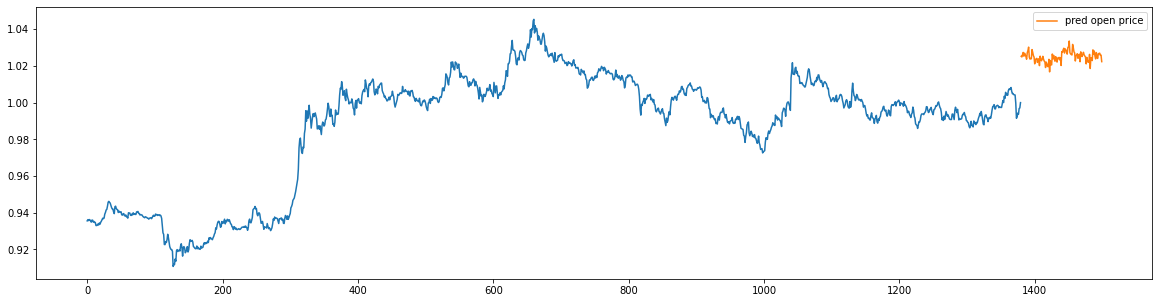

In [33]:
row +=1
plt.figure(figsize=(20,5))

plt.plot(test_x[row,:, 0])
plt.plot(np.arange(test_x.shape[1], test_x.shape[1]+ submission.shape[1]), submission[row, :, 0], label='pred open price')
plt.legend()
plt.show()

In [34]:
test_x[row,:, 0]

<tf.Tensor: shape=(1380,), dtype=float64, numpy=
array([0.93553561, 0.93619257, 0.93566424, ..., 0.99679416, 0.99709255,
       1.        ])>

결과물을 submission형태로 재구성해서 csv파일 생성

In [35]:
submit_columns = [
                  "sample_id", 
                  "buy_quantity", 
                  "sell_time"
                  ]

In [36]:
sample_submission['buy_quantity'] = 1
sample_submission['sell_time']= np.argmax(submission[:,:,0], axis=1)
subm = pd.DataFrame(data=sample_submission, columns=submit_columns)

In [39]:
subm.head()

,sample_id,buy_quantity,sell_time
0,7929,1,71
1,7930,1,71
2,7931,1,71
3,7932,1,71
4,7933,1,71


In [40]:
subm.to_csv("submission_lstm1.csv", index=False)

### Try2 : 1계층의 GRU Layer를 쌓고 30에폭으로 학습

In [41]:
time        = new_train_x.shape[1] #170
num_features= new_train_x.shape[2] #1
OUT_STEPS   = new_train_y.shape[1] #60

#####층 쌓기###########

model=Sequential([
GRU(32, input_shape=(time, num_features), dropout=0.2, recurrent_dropout=0.2),
Dense(OUT_STEPS * num_features),
Reshape([OUT_STEPS, num_features])
])

#######Compile 구성하기################

model.compile(optimizer='rmsprop', loss='mae', metrics=['mae', 'accuracy'])
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 1 == 0: print(epoch)
        print('.', end='')

save_best_only=tf.keras.callbacks.ModelCheckpoint(filepath="lstm_model.h5", monitor='val_loss', save_best_only=True)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

reduceLR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10)


######################
history = model.fit(new_train_x, new_train_y, epochs=30, batch_size=64, validation_split = 0.2, verbose=0, callbacks=[PrintDot(), early_stop, save_best_only , reduceLR])

0
.1
.2
.3
.4
.5
.6
.7
.8
.9
.10
.11
.12
.13
.14
.15
.16
.17
.18
.19
.20
.21
.22
.23
.24
.25
.26
.27
.28
.29
.

In [42]:
pd.DataFrame(history.history)

,loss,mae,accuracy,val_loss,val_mae,val_accuracy,lr
0,0.072282,0.072282,0.002284,0.025551,0.025551,0.002028,0.001
1,0.029997,0.029997,0.002353,0.024603,0.024603,0.002028,0.001
2,0.029042,0.029042,0.002353,0.028010,0.028010,0.002028,0.001
3,0.028342,0.028342,0.002353,0.035720,0.035720,0.002028,0.001
4,0.027573,0.027573,0.002353,0.025172,0.025172,0.002028,0.001
5,0.027115,0.027115,0.002353,0.022220,0.022220,0.002028,0.001
6,0.026537,0.026537,0.002353,0.022202,0.022202,0.002028,0.001
7,0.026194,0.026194,0.002353,0.036042,0.036042,0.002028,0.001
8,0.025916,0.025916,0.002353,0.021571,0.021571,0.002028,0.001
9,0.025529,0.025529,0.002353,0.028449,0.028449,0.002028,0.001


In [43]:
print(new_train_x.shape, new_train_y.shape)

(39645, 170, 1) (39645, 60, 1)


In [44]:
test_x = tf.reshape(test_x_df.iloc[:,3].values, [-1, 1380, 1])

In [45]:
auto_x=test_x
auto_x.shape

TensorShape([760, 1380, 1])

In [46]:
submission=np.zeros((760, 120, 9))

In [47]:
end_=120
output_window = 60

for i in range(end_//output_window):
    start_ = i *output_window
    next_ = model.predict(auto_x[:, -170:, :])
    auto_x=tf.concat([auto_x, next_], axis=1)
    print(auto_x.shape)
    submission[:, start_ : start_ + output_window, :] = next_

(760, 1440, 1)
(760, 1500, 1)


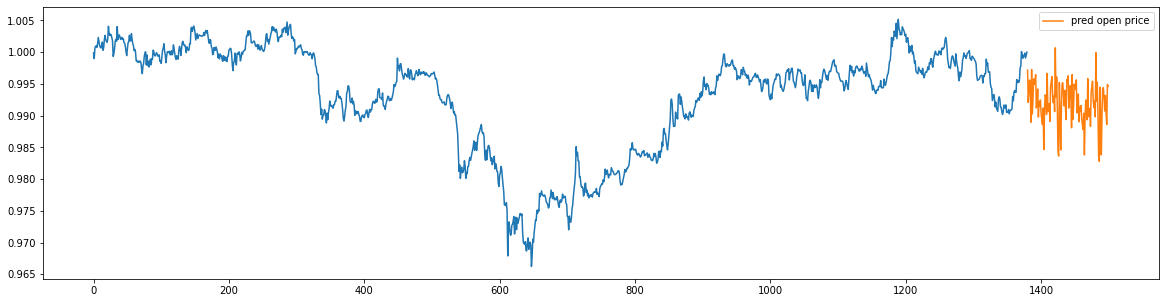

In [48]:
row +=1
plt.figure(figsize=(20,5))

plt.plot(test_x[row,:, 0])
plt.plot(np.arange(test_x.shape[1], test_x.shape[1]+ submission.shape[1]), submission[row, :, 0], label='pred open price')
plt.legend()
plt.show()

In [49]:
submit_columns = [
                  "sample_id", 
                  "buy_quantity", 
                  "sell_time"
                  ]

In [50]:
sample_submission['buy_quantity'] = 1
sample_submission['sell_time']= np.argmax(submission[:,:,0], axis=1)
subm = pd.DataFrame(data=sample_submission, columns=submit_columns)

In [51]:
subm.to_csv("submission_gru1.csv", index=False)

### Try3 : 정규화 후 1계층 LSTM Layer를 쌓고 30에폭으로 학습

In [70]:
train_x_df=pd.read_csv('train_x_df.csv') 
train_y_df=pd.read_csv('train_y_df.csv')
test_x_df=pd.read_csv('test_x_df.csv')
sample_submission=pd.read_csv('sample_submission.csv')

train_x_df.iloc[:,3:].values

train_x = tf.reshape(train_x_df.iloc[:,3].values, [-1, 1380, 1])
train_y = tf.reshape(train_y_df.iloc[:,3].values, [-1, 120, 1])
test_x = tf.reshape(test_x_df.iloc[:,3].values, [-1, 1380, 1])

### Min Max Normalization

In [71]:
train_x = (train_x-np.min(train_x))/(np.max(train_x)-np.min(train_x))

In [72]:
train_y = (train_y-np.min(train_y))/(np.max(train_y)-np.min(train_y))

In [74]:
test_y = (test_x-np.min(test_x))/(np.max(test_x)-np.min(test_x))

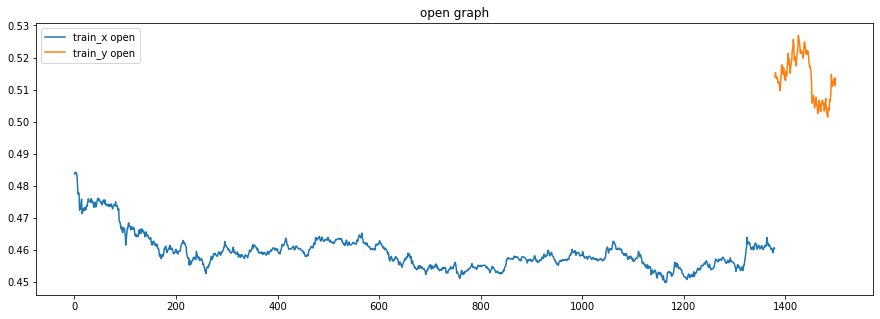

In [78]:
row=1
plt.figure(figsize=(15,5))


plt.plot(train_x[row,:,0], label='train_x open')
plt.plot(np.arange(train_x.shape[1],train_x.shape[1]+ train_y.shape[1]), train_y[row, :, 0], label='train_y open')
plt.legend()
plt.title('open graph')
plt.show()

In [79]:
new_train_x=tf.reshape(train_window_x, [-1, 170, 1])
new_train_y=tf.reshape(train_window_y, [-1, 60, 1])

In [80]:
time        = new_train_x.shape[1] #170
num_features= new_train_x.shape[2] #1
OUT_STEPS   = new_train_y.shape[1] #60

#####층 쌓기###########


model=Sequential([
LSTM(32, input_shape=(time, num_features), dropout=0.2, recurrent_dropout=0.2),
Dense(OUT_STEPS * num_features),
Reshape([OUT_STEPS, num_features])
])



#######Compile 구성하기################


model.compile(optimizer='rmsprop', loss='mae', metrics=['mae', 'accuracy'])
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 1 == 0: print(epoch)
        print('.', end='')

#가장 좋은 성능을 낸 val_loss가 적은 model만 남겨 놓았습니다.
save_best_only=tf.keras.callbacks.ModelCheckpoint(filepath="lstm_model.h5", monitor='val_loss', save_best_only=True)


early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

#검증 손실이 10epoch 동안 좋아지지 않으면 학습률을 0.1 배로 재구성하는 명령어입니다.
reduceLR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10)


######################
history = model.fit(new_train_x, new_train_y, epochs=30, batch_size=64, validation_split = 0.2, verbose=0, callbacks=[PrintDot(), early_stop, save_best_only , reduceLR])

0
.1
.2
.3
.4
.5
.6
.7
.8
.9
.10
.11
.12
.13
.14
.15
.16
.17
.18
.19
.20
.21
.22
.23
.24
.25
.26
.27
.28
.29
.

In [81]:
pd.DataFrame(history.history)

,loss,mae,accuracy,val_loss,val_mae,val_accuracy,lr
0,0.071453,0.071453,0.002271,0.028396,0.028396,0.002028,0.001
1,0.032105,0.032105,0.002353,0.032326,0.032326,0.002028,0.001
2,0.030571,0.030571,0.002353,0.030872,0.030872,0.002028,0.001
3,0.030024,0.030024,0.002353,0.029693,0.029693,0.002028,0.001
4,0.029864,0.029864,0.002353,0.030732,0.030732,0.002028,0.001
5,0.029756,0.029756,0.002353,0.026740,0.026740,0.002028,0.001
6,0.029441,0.029441,0.002353,0.036616,0.036616,0.002028,0.001
7,0.029374,0.029374,0.002353,0.028471,0.028471,0.002028,0.001
8,0.029216,0.029216,0.002353,0.026916,0.026916,0.002028,0.001
9,0.029069,0.029069,0.002353,0.029006,0.029006,0.002028,0.001


In [82]:
test_x = tf.reshape(test_x_df.iloc[:,3].values, [-1, 1380, 1])

In [83]:
auto_x=test_x
auto_x.shape

TensorShape([760, 1380, 1])

In [84]:
submission=np.zeros((760, 120, 9))

In [85]:
end_=120
output_window = 60

for i in range(end_//output_window):
    start_ = i *output_window
    next_ = model.predict(auto_x[:, -170:, :])
    auto_x=tf.concat([auto_x, next_], axis=1)
    print(auto_x.shape)
    submission[:, start_ : start_ + output_window, :] = next_

(760, 1440, 1)
(760, 1500, 1)


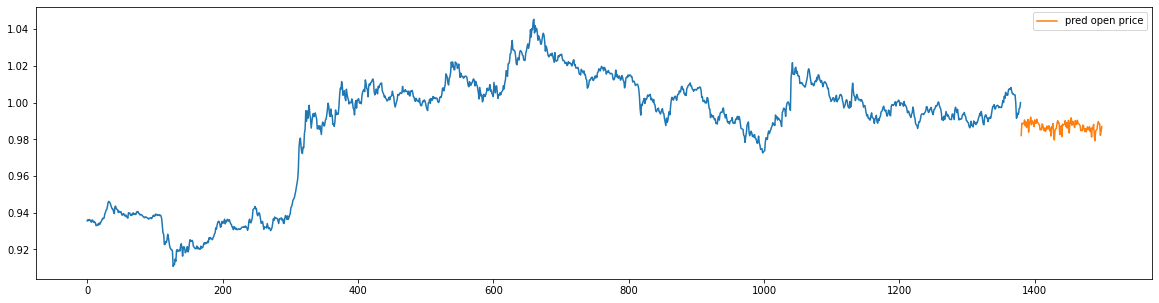

In [86]:
row +=1
plt.figure(figsize=(20,5))

plt.plot(test_x[row,:, 0])
plt.plot(np.arange(test_x.shape[1], test_x.shape[1]+ submission.shape[1]), submission[row, :, 0], label='pred open price')
plt.legend()
plt.show()

In [88]:
submit_columns = [
                  "sample_id", 
                  "buy_quantity", 
                  "sell_time"
                  ]

In [89]:
sample_submission['buy_quantity'] = 1
sample_submission['sell_time']= np.argmax(submission[:,:,0], axis=1)
subm = pd.DataFrame(data=sample_submission, columns=submit_columns)

In [90]:
subm.to_csv("submission_lstm2.csv", index=False)

### Try4 : 정규화, LSTM 깊게

In [104]:
time        = new_train_x.shape[1] #170
num_features= new_train_x.shape[2] #1
OUT_STEPS   = new_train_y.shape[1] #60

#####층 쌓기###########




model=Sequential([
LSTM(16, input_shape=(time, num_features), dropout=0.2, recurrent_dropout=0.2),
Dense(32),
Dense(OUT_STEPS * num_features),
Reshape([OUT_STEPS, num_features])
])



#######Compile 구성하기################


model.compile(optimizer='adam', loss='mae', metrics=['mae', 'accuracy'])
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 1 == 0: print(epoch)
        print('.', end='')

#가장 좋은 성능을 낸 val_loss가 적은 model만 남겨 놓았습니다.
save_best_only=tf.keras.callbacks.ModelCheckpoint(filepath="lstm_model.h5", monitor='val_loss', save_best_only=True)


early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

#검증 손실이 10epoch 동안 좋아지지 않으면 학습률을 0.1 배로 재구성하는 명령어입니다.
reduceLR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10)


######################
history = model.fit(new_train_x, new_train_y, epochs=30, batch_size=64, validation_split = 0.2, verbose=0, callbacks=[PrintDot(), early_stop, save_best_only , reduceLR])

0
.1
.2
.3
.4
.5
.6
.7
.8
.9
.10
.11
.12
.13
.14
.15
.16
.17
.18
.19
.20
.21
.22
.23
.24
.25
.26
.27
.28
.29
.

In [105]:
pd.DataFrame(history.history)

,loss,mae,accuracy,val_loss,val_mae,val_accuracy,lr
0,0.100875,0.100875,0.002170,0.026407,0.026407,0.002028,0.001
1,0.027759,0.027759,0.002353,0.027723,0.027723,0.002028,0.001
2,0.026871,0.026871,0.002353,0.025278,0.025278,0.002028,0.001
3,0.026584,0.026584,0.002353,0.024984,0.024984,0.002028,0.001
4,0.026297,0.026297,0.002353,0.025172,0.025172,0.002028,0.001
5,0.026062,0.026063,0.002353,0.027029,0.027029,0.002028,0.001
6,0.026138,0.026138,0.002353,0.024671,0.024671,0.002028,0.001
7,0.025751,0.025751,0.002353,0.024200,0.024200,0.002028,0.001
8,0.025479,0.025479,0.002353,0.024866,0.024866,0.002028,0.001
9,0.024728,0.024728,0.002353,0.026789,0.026789,0.002028,0.001


In [106]:
test_x = tf.reshape(test_x_df.iloc[:,3].values, [-1, 1380, 1])

In [107]:
auto_x=test_x
auto_x.shape

TensorShape([760, 1380, 1])

In [108]:
submission=np.zeros((760, 120, 9))

In [109]:
end_=120
output_window = 60

for i in range(end_//output_window):
    start_ = i *output_window
    next_ = model.predict(auto_x[:, -170:, :])
    auto_x=tf.concat([auto_x, next_], axis=1)
    print(auto_x.shape)
    submission[:, start_ : start_ + output_window, :] = next_

(760, 1440, 1)
(760, 1500, 1)


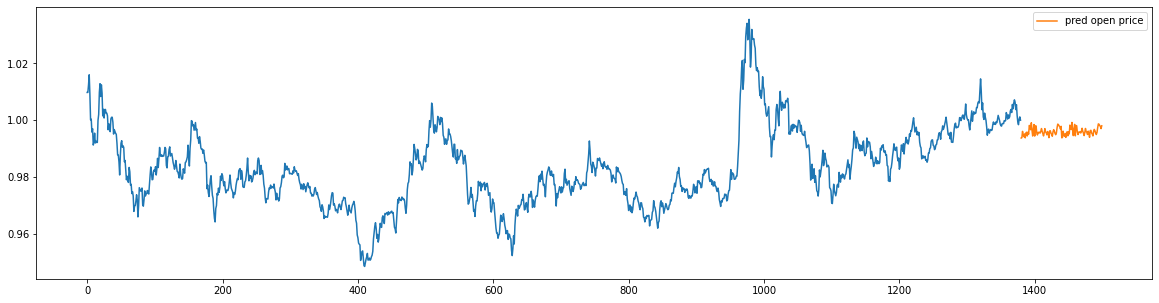

In [110]:
row +=1
plt.figure(figsize=(20,5))

plt.plot(test_x[row,:, 0])
plt.plot(np.arange(test_x.shape[1], test_x.shape[1]+ submission.shape[1]), submission[row, :, 0], label='pred open price')
plt.legend()
plt.show()

In [111]:
submit_columns = [
                  "sample_id", 
                  "buy_quantity", 
                  "sell_time"
                  ]

In [112]:
sample_submission['buy_quantity'] = 1
sample_submission['sell_time']= np.argmax(submission[:,:,0], axis=1)
subm = pd.DataFrame(data=sample_submission, columns=submit_columns)

In [113]:
subm.to_csv("submission_lstm3.csv", index=False)

### Try4 : 정규화, GRU 깊게

In [114]:
time        = new_train_x.shape[1] #170
num_features= new_train_x.shape[2] #1
OUT_STEPS   = new_train_y.shape[1] #60

#####층 쌓기###########




model=Sequential([
GRU(16, input_shape=(time, num_features), dropout=0.2, recurrent_dropout=0.2),
Dense(32),
Dense(OUT_STEPS * num_features),
Reshape([OUT_STEPS, num_features])
])



#######Compile 구성하기################


model.compile(optimizer='adam', loss='mae', metrics=['mae', 'accuracy'])
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 1 == 0: print(epoch)
        print('.', end='')

#가장 좋은 성능을 낸 val_loss가 적은 model만 남겨 놓았습니다.
save_best_only=tf.keras.callbacks.ModelCheckpoint(filepath="lstm_model.h5", monitor='val_loss', save_best_only=True)


early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

#검증 손실이 10epoch 동안 좋아지지 않으면 학습률을 0.1 배로 재구성하는 명령어입니다.
reduceLR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10)


######################
history = model.fit(new_train_x, new_train_y, epochs=30, batch_size=64, validation_split = 0.2, verbose=0, callbacks=[PrintDot(), early_stop, save_best_only , reduceLR])

0
.1
.2
.3
.4
.5
.6
.7
.8
.9
.10
.11
.12
.13
.14
.15
.16
.17
.18
.19
.20
.21
.22
.23
.24
.25
.26
.27
.28
.29
.

In [115]:
pd.DataFrame(history.history)

,loss,mae,accuracy,val_loss,val_mae,val_accuracy,lr
0,0.104206,0.104206,0.002205,0.031862,0.031862,0.002028,0.0010
1,0.025232,0.025232,0.002353,0.022076,0.022076,0.002028,0.0010
2,0.024548,0.024548,0.002353,0.022105,0.022105,0.002028,0.0010
3,0.023899,0.023899,0.002353,0.021009,0.021009,0.002028,0.0010
4,0.023465,0.023465,0.002353,0.019751,0.019751,0.002028,0.0010
5,0.022778,0.022778,0.002353,0.020254,0.020254,0.002028,0.0010
6,0.022243,0.022243,0.002353,0.020792,0.020792,0.002028,0.0010
7,0.021873,0.021873,0.002353,0.018475,0.018475,0.002028,0.0010
8,0.021188,0.021188,0.002353,0.016034,0.016034,0.002028,0.0010
9,0.020861,0.020861,0.002353,0.015350,0.015350,0.002028,0.0010


In [116]:
auto_x=test_x
auto_x.shape

TensorShape([760, 1380, 1])

In [117]:
submission=np.zeros((760, 120, 9))

In [118]:
end_=120
output_window = 60

for i in range(end_//output_window):
    start_ = i *output_window
    next_ = model.predict(auto_x[:, -170:, :])
    auto_x=tf.concat([auto_x, next_], axis=1)
    print(auto_x.shape)
    submission[:, start_ : start_ + output_window, :] = next_

(760, 1440, 1)
(760, 1500, 1)


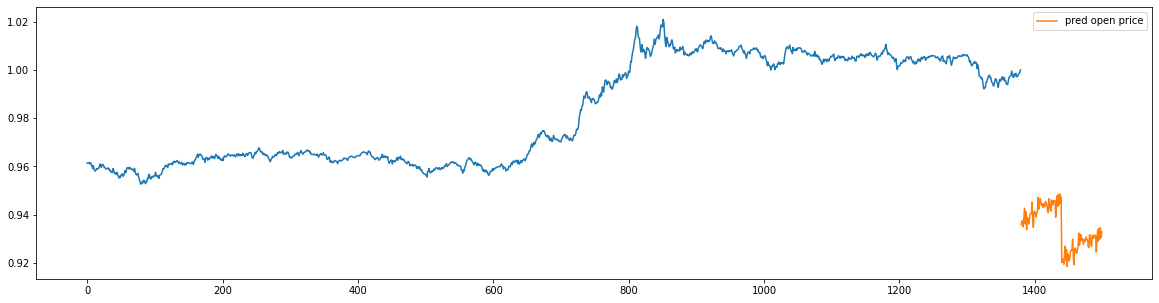

In [119]:
row +=1
plt.figure(figsize=(20,5))

plt.plot(test_x[row,:, 0])
plt.plot(np.arange(test_x.shape[1], test_x.shape[1]+ submission.shape[1]), submission[row, :, 0], label='pred open price')
plt.legend()
plt.show()

In [120]:
submit_columns = [
                  "sample_id", 
                  "buy_quantity", 
                  "sell_time"
                  ]

In [121]:
sample_submission['buy_quantity'] = 1
sample_submission['sell_time']= np.argmax(submission[:,:,0], axis=1)
subm = pd.DataFrame(data=sample_submission, columns=submit_columns)

In [122]:
subm.to_csv("submission_gru2.csv", index=False)